# Step 1: Understanding Business
## Questions of my interest:
### 1. How to enter the field?
### 2. What are the job placement and salary rates for bootcamp?
### 3. What affects or relates to salary?
### 4. What relates to job satisfaction?

# Step 2: Understanding Data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from collections import defaultdict
from IPython import display
%matplotlib inline

df = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [2]:
#checkng number of rows and columns

rows = df.shape[0]
columns = df.shape[1]

print("The number of rows are: {}".format(rows))
print("The number of columns are: {}".format(columns))

The number of rows are: 51392
The number of columns are: 154


### Finding columns with no missing values

In [3]:
no_nulls = df.columns[np.sum(df.isnull()) == 0]

In [4]:
print(no_nulls)

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation'], dtype='object')


### Finding columns with more than 75% missing values

In [5]:
more_than_75 = df.columns[np.sum(df.isnull() / df.shape[0]) > .75]

In [6]:
print(more_than_75)

Index(['YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'TimeAfterBootcamp', 'ExpectedSalary'], dtype='object')


### Counting number of individuals in each status and plotting it

In [7]:
status_count = df.Professional.value_counts()
print(status_count)

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64


Text(0.5, 1.0, 'Type of Developers')

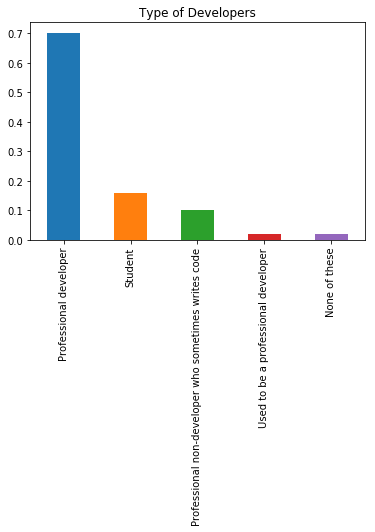

In [8]:
(status_count/df.shape[0]).plot(kind = 'bar')
plt.title("Type of Developers")

### Plotting ProgramHobby

Yes, I program as a hobby                    24801
Yes, both                                    13756
No                                            9787
Yes, I contribute to open source projects     3048
Name: ProgramHobby, dtype: int64


Text(0.5, 1.0, 'Is programming hobby?')

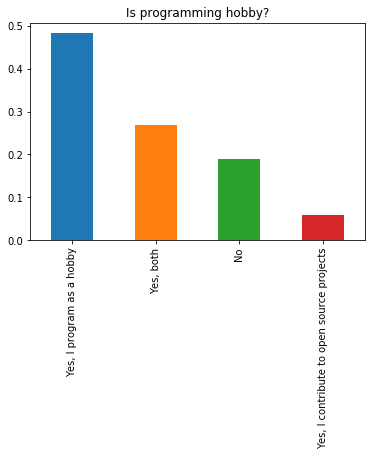

In [9]:
progHobby = df.ProgramHobby.value_counts()
print(progHobby)

(progHobby/df.shape[0]).plot(kind = 'bar')
plt.title("Is programming hobby?")

### Plotting Formal Education

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64


Text(0.5, 1.0, 'Formal Education')

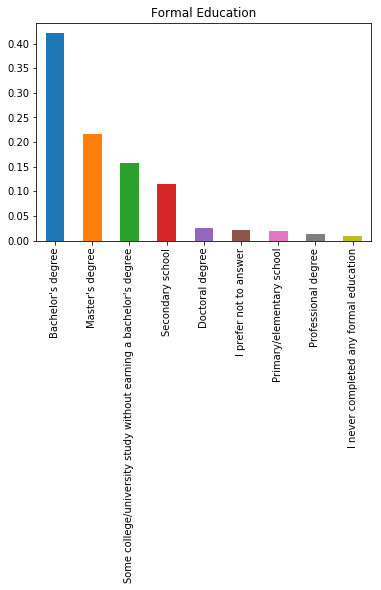

In [10]:
formalEducation = df.FormalEducation.value_counts()
print(formalEducation)

(formalEducation/df.shape[0]).plot(kind = 'bar')
plt.title("Formal Education")

### Plotting Job Satisfaction

8.0     8983
7.0     7969
9.0     5573
6.0     4726
10.0    4148
5.0     3749
4.0     1865
3.0     1635
2.0      888
0.0      467
1.0      373
Name: JobSatisfaction, dtype: int64


Text(0.5, 1.0, 'Job Satisfaction')

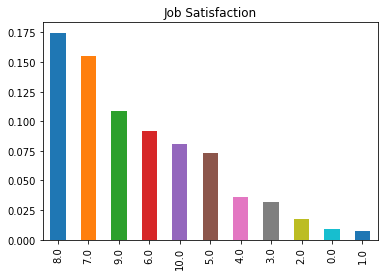

In [11]:
jobSatisfaction = df.JobSatisfaction.value_counts()
print(jobSatisfaction)

(jobSatisfaction/df.shape[0]).plot(kind = 'bar')
plt.title("Job Satisfaction")

### Finding salary based on gender and formal education of a professional developer

In [12]:
pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'FormalEducation']).mean()['Salary'])

Salary
Gender FormalEducation                                                 
Female Bachelor's degree                                   60040.908291
       Doctoral degree                                     90623.768006
       I never completed any formal education                       NaN
       I prefer not to answer                              13255.786387
       Master's degree                                     56210.867588
       Primary/elementary school                           32258.064516
       Professional degree                                 45458.307618
       Secondary school                                    41110.162320
       Some college/university study without earning a...  48116.699754
Male   Bachelor's degree                                   57413.518034
       Doctoral degree                                     76872.602904
       I never completed any formal education              43090.588914
       I prefer not to answer                              37629.362623
       Master's degree                                     59156.503938
       Primary/elementary school                           63777.121965
       Professional degree                                 40901.083005
       Secondary school                                    41353.206724
       Some college/university study without earning a...  57262.911063

# Step 3: Preparing Data 
### As the data is readily available we don't need to perform this step
